### Importation des bibliothèques nécessaires

In [ ]:
import os
import pandas as pd
import numpy as np

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Modèles entrainés sur les caractéristiques extraites par VGG19

In [ ]:
# model_image = load_model('/content/drive/MyDrive/Multimodale/Model/Model - Tardive/model_image_tardive_VGG19.h5')
# model = load_model('/content/drive/MyDrive/Multimodale/Model/Model - Tardive/model_audio_tardive_VGG19.h5')
# bagging_model = load('/content/drive/MyDrive/Multimodale/Model/Model - Tardive/model_bagging_tardive_VGG19.joblib')

Modèles entrainés sur les caractéristiques extraites par INCEPTIONv3

In [ ]:
# model_image = load_model('/content/drive/MyDrive/Multimodale/Model/Model - Tardive/model_image_tardive_INCEPTIONv3.h5')
# model = load_model('/content/drive/MyDrive/Multimodale/Model/Model - Tardive/model_audio_tardive_INCEPTIONv3.h5')
# bagging_model = load('/content/drive/MyDrive/Multimodale/Model/Model - Tardive/model_bagging_tardive_INCEPTIONv3.joblib')

Modèles entrainés sur les caractéristiques extraites par RESNET

In [ ]:
# model_image = load_model('/content/drive/MyDrive/Multimodale/Model/Model - Tardive/model_image_tardive_RESNET50.h5')
# model = load_model('/content/drive/MyDrive/Multimodale/Model/Model - Tardive/model_audio_tardive_RESNET50.h5')
# bagging_model = load('/content/drive/MyDrive/Multimodale/Model/Model - Tardive/model_bagging_tardive_RESNET50.joblib')

### Importation et prétraitement des données

In [ ]:
path = '/content/drive/My Drive/Multimodale/Data_Features/'

**Visualisation du dossier `Data`**

In [ ]:
os.listdir(path)

['dataset.csv',
 'images_features.csv',
 'audios_features.csv',
 'images_features_inception.csv',
 'images_features_resnet.csv']

### Importation des données : images

In [ ]:
scenes_data = pd.read_csv(os.path.join(path, 'images_features.csv'))
# scenes_data = pd.read_csv(os.path.join(path, 'images_features_inception.csv'))
# scenes_data = pd.read_csv(os.path.join(path, 'images_features_resnet.csv'))

In [ ]:
scenes_data.head(5)

,SubClass,IMAGE,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,...,C_4086,C_4087,C_4088,C_4089,C_4090,C_4091,C_4092,C_4093,C_4094,C_4095
0,beach,beach0.png,0.538444,0.0,0.463963,0.028087,1.296627,0.921912,0.0,0.0,...,0.038778,0.904302,0.992052,0.869632,0.0,0.0,0.0,0.0,0.325832,0.090953
1,beach,beach1.png,0.478749,0.0,0.473210,0.054322,1.282259,0.920567,0.0,0.0,...,0.085440,0.813594,0.995918,0.787818,0.0,0.0,0.0,0.0,0.302753,0.100030
2,beach,beach10.png,0.385724,0.0,0.556242,0.000000,1.229769,0.983087,0.0,0.0,...,0.152053,0.868707,1.031767,0.771014,0.0,0.0,0.0,0.0,0.240575,0.052493
3,beach,beach100.png,0.518872,0.0,0.564591,0.000000,1.280057,0.901700,0.0,0.0,...,0.062651,0.821810,1.018209,0.728661,0.0,0.0,0.0,0.0,0.272786,0.080897
4,beach,beach101.png,0.549013,0.0,0.554230,0.000000,1.282579,0.902930,0.0,0.0,...,0.069760,0.803324,1.024356,0.739038,0.0,0.0,0.0,0.0,0.264427,0.075939


### Prétraitement des caractéristiques mfcc: audio

L'objectif de cette partie est d'importer et prétraiter les caractéristiques mfcc.

#### Importation des données auditives

In [ ]:
mfcc_features = pd.read_csv(os.path.join(path, 'dataset.csv'))

In [ ]:
# les cinq premiers lignes
mfcc_features.head(5)

,IMAGE,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_97,mfcc_98,mfcc_99,mfcc_100,mfcc_101,mfcc_102,mfcc_103,mfcc_104,CLASS1,CLASS2
0,images/forest/forest0.png,15.795384,-3.442518,-25.316836,-33.412104,2.447290,-46.981182,12.889984,-23.588534,-22.625879,...,-43.876462,20.697491,-22.793173,-9.417196,13.762870,-31.976786,18.461561,-13.140674,OUTDOORS,FOREST
1,images/forest/forest1.png,15.883880,-3.494075,-21.189490,-18.077115,4.284962,-27.014271,3.666955,-9.091312,-3.746509,...,-33.883092,17.223236,-24.985005,12.035913,8.321000,-16.249293,8.717523,0.743640,OUTDOORS,FOREST
2,images/forest/forest2.png,17.872629,-18.877467,-31.665319,-47.045579,1.813430,-45.899877,14.975982,-24.462396,-1.812962,...,-34.456028,21.433239,-14.190274,-8.629235,1.035640,-20.703358,5.986662,-14.644013,OUTDOORS,FOREST
3,images/forest/forest3.png,16.843997,-3.527753,-21.282970,-24.248141,27.201589,-18.787674,30.093938,-1.922008,10.156418,...,-36.410615,19.949251,-5.466172,6.480569,13.070739,-14.853299,10.243606,-17.983957,OUTDOORS,FOREST
4,images/forest/forest4.png,16.128583,-4.267328,-25.608325,-20.231084,15.922823,-35.703313,16.307644,-3.547505,4.804142,...,-41.548915,15.697646,-20.615005,-11.942869,5.421639,-27.445147,9.060233,-15.077528,OUTDOORS,FOREST


La colonne IMAGE indique le chemin vers les images qu'on a traité précédément, et les colonnes MFCC_1 à MFCC_104 contiennent des coefficients cepstraux de fréquence Mel (MFCC) et CLASS2 représente la classe principale.

In [ ]:
# Nombre de classes
num_classes = mfcc_features['CLASS2'].nunique()
print(f"Nombre de classes: {num_classes}")

# Nombre d'images par classe
images_per_class = mfcc_features['CLASS2'].value_counts().sort_index()
print("\nNombre d'images par classe:")
print(images_per_class)

# Nombre total de lignes
num_rows = mfcc_features.shape[0]
print(f"\nNombre total de lignes dans le fichier: {num_rows}")

Nombre de classes: 9

Nombre d'images par classe:
CLASS2
BEACH             2080
CITY              2432
CLASSROOM         2753
FOOTBALL-MATCH    1600
FOREST            1361
GROCERY-STORE     2079
JUNGLE            1404
RESTAURANT        1459
RIVER             2084
Name: count, dtype: int64

Nombre total de lignes dans le fichier: 17252


#### Prétraitement des données

1. vérification si le DataFrame contient des valeurs manquantes (NaN) ou des chaînes vides.  Si des valeurs manquantes sont trouvées, la fonction renverra `True`. Cela est important pour le pré-traitement des données avant l'apprentissage automatique.

In [ ]:
print(((mfcc_features.isnull()) | (mfcc_features.eq(""))).any().any())  # Vérifie toutes les colonnes

False


2. Modification de la colonne 'IMAGE' du DataFrame mfcc_features en ne conservant que le nom de l'image, puis insértion d'une nouvelle colonne 'subclass' qui contient le nom de la scène.

In [ ]:
images_names = mfcc_features['IMAGE']
mfcc_features['IMAGE'] = [name.split('/')[-1] for name in images_names]
mfcc_features.insert(0, 'SubClass', [name.split('/')[1] for name in images_names])

In [ ]:
mfcc_features.head(5)

,SubClass,IMAGE,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,mfcc_97,mfcc_98,mfcc_99,mfcc_100,mfcc_101,mfcc_102,mfcc_103,mfcc_104,CLASS1,CLASS2
0,forest,forest0.png,15.795384,-3.442518,-25.316836,-33.412104,2.447290,-46.981182,12.889984,-23.588534,...,-43.876462,20.697491,-22.793173,-9.417196,13.762870,-31.976786,18.461561,-13.140674,OUTDOORS,FOREST
1,forest,forest1.png,15.883880,-3.494075,-21.189490,-18.077115,4.284962,-27.014271,3.666955,-9.091312,...,-33.883092,17.223236,-24.985005,12.035913,8.321000,-16.249293,8.717523,0.743640,OUTDOORS,FOREST
2,forest,forest2.png,17.872629,-18.877467,-31.665319,-47.045579,1.813430,-45.899877,14.975982,-24.462396,...,-34.456028,21.433239,-14.190274,-8.629235,1.035640,-20.703358,5.986662,-14.644013,OUTDOORS,FOREST
3,forest,forest3.png,16.843997,-3.527753,-21.282970,-24.248141,27.201589,-18.787674,30.093938,-1.922008,...,-36.410615,19.949251,-5.466172,6.480569,13.070739,-14.853299,10.243606,-17.983957,OUTDOORS,FOREST
4,forest,forest4.png,16.128583,-4.267328,-25.608325,-20.231084,15.922823,-35.703313,16.307644,-3.547505,...,-41.548915,15.697646,-20.615005,-11.942869,5.421639,-27.445147,9.060233,-15.077528,OUTDOORS,FOREST


3. Normalisation des valeurs numériques

In [ ]:
scaler = StandardScaler()

mfcc_features.iloc[:, 2:106] = scaler.fit_transform(mfcc_features.iloc[:, 2:106])

In [ ]:
mfcc_features.head(5)

,SubClass,IMAGE,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,mfcc_97,mfcc_98,mfcc_99,mfcc_100,mfcc_101,mfcc_102,mfcc_103,mfcc_104,CLASS1,CLASS2
0,forest,forest0.png,0.032192,-0.327052,-1.523003,-1.477271,-0.230774,-1.573336,0.325811,-0.977583,...,-0.453716,-0.211530,-0.263544,-0.546765,0.811850,-1.291026,0.891798,-1.007906,OUTDOORS,FOREST
1,forest,forest1.png,0.057678,-0.332238,-1.112717,-0.301945,-0.105907,-0.387745,-0.291817,0.230874,...,0.289648,-0.465387,-0.457838,1.251629,0.440028,-0.188425,0.170391,0.338778,OUTDOORS,FOREST
2,forest,forest2.png,0.630405,-1.879458,-2.154085,-2.522188,-0.273843,-1.509130,0.465502,-1.050427,...,0.247030,-0.157770,0.499056,-0.480711,-0.057752,-0.500684,-0.031790,-1.153719,OUTDOORS,FOREST
3,forest,forest3.png,0.334176,-0.335625,-1.122010,-0.774914,1.451238,0.100732,1.477890,0.828492,...,0.101636,-0.266202,1.272400,0.785930,0.764559,-0.090556,0.283376,-1.477671,OUTDOORS,FOREST
4,forest,forest4.png,0.128148,-0.410010,-1.551979,-0.467033,0.684865,-0.903681,0.554678,0.692994,...,-0.280580,-0.576859,-0.070461,-0.758489,0.241926,-0.973328,0.195764,-1.195767,OUTDOORS,FOREST


4. Suppression de la colonne CLASS1 : notre objectif est de prédire auquelle classe une frame ( image, audio) appartient, donc cette colonne n'a pas d'importance

In [ ]:
mfcc_features.drop(columns=["CLASS1"], inplace=True)

Rennomage de CLASS2 à Label

In [ ]:
mfcc_features.rename(columns={'CLASS2': 'Label'}, inplace=True)

In [ ]:
mfcc_features.head(5)

,SubClass,IMAGE,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,mfcc_96,mfcc_97,mfcc_98,mfcc_99,mfcc_100,mfcc_101,mfcc_102,mfcc_103,mfcc_104,Label
0,forest,forest0.png,0.032192,-0.327052,-1.523003,-1.477271,-0.230774,-1.573336,0.325811,-0.977583,...,-0.868543,-0.453716,-0.211530,-0.263544,-0.546765,0.811850,-1.291026,0.891798,-1.007906,FOREST
1,forest,forest1.png,0.057678,-0.332238,-1.112717,-0.301945,-0.105907,-0.387745,-0.291817,0.230874,...,0.822282,0.289648,-0.465387,-0.457838,1.251629,0.440028,-0.188425,0.170391,0.338778,FOREST
2,forest,forest2.png,0.630405,-1.879458,-2.154085,-2.522188,-0.273843,-1.509130,0.465502,-1.050427,...,-0.241640,0.247030,-0.157770,0.499056,-0.480711,-0.057752,-0.500684,-0.031790,-1.153719,FOREST
3,forest,forest3.png,0.334176,-0.335625,-1.122010,-0.774914,1.451238,0.100732,1.477890,0.828492,...,-0.220467,0.101636,-0.266202,1.272400,0.785930,0.764559,-0.090556,0.283376,-1.477671,FOREST
4,forest,forest4.png,0.128148,-0.410010,-1.551979,-0.467033,0.684865,-0.903681,0.554678,0.692994,...,-0.147963,-0.280580,-0.576859,-0.070461,-0.758489,0.241926,-0.973328,0.195764,-1.195767,FOREST


5. Association à chaque valeur unique de la colonne 'Label' de mfcc_features un entier unique par le LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

mfcc_features['Label'] = label_encoder.fit_transform(mfcc_features['Label'])

In [ ]:
mfcc_features.head(5)

,SubClass,IMAGE,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,mfcc_96,mfcc_97,mfcc_98,mfcc_99,mfcc_100,mfcc_101,mfcc_102,mfcc_103,mfcc_104,Label
0,forest,forest0.png,0.032192,-0.327052,-1.523003,-1.477271,-0.230774,-1.573336,0.325811,-0.977583,...,-0.868543,-0.453716,-0.211530,-0.263544,-0.546765,0.811850,-1.291026,0.891798,-1.007906,4
1,forest,forest1.png,0.057678,-0.332238,-1.112717,-0.301945,-0.105907,-0.387745,-0.291817,0.230874,...,0.822282,0.289648,-0.465387,-0.457838,1.251629,0.440028,-0.188425,0.170391,0.338778,4
2,forest,forest2.png,0.630405,-1.879458,-2.154085,-2.522188,-0.273843,-1.509130,0.465502,-1.050427,...,-0.241640,0.247030,-0.157770,0.499056,-0.480711,-0.057752,-0.500684,-0.031790,-1.153719,4
3,forest,forest3.png,0.334176,-0.335625,-1.122010,-0.774914,1.451238,0.100732,1.477890,0.828492,...,-0.220467,0.101636,-0.266202,1.272400,0.785930,0.764559,-0.090556,0.283376,-1.477671,4
4,forest,forest4.png,0.128148,-0.410010,-1.551979,-0.467033,0.684865,-0.903681,0.554678,0.692994,...,-0.147963,-0.280580,-0.576859,-0.070461,-0.758489,0.241926,-0.973328,0.195764,-1.195767,4


### Fusion des deux types de données, audtives et visuelles pour une séparation train et test optimale

Notre objectif dans cette partie est de regrouper les colonnes de la dataframe `mfcc_features` avec celles de `scenes_data`, pour une facile division en train et test pour les deux types de données.

In [ ]:
len(mfcc_features)

17252

In [ ]:
len(scenes_data)

17252

On trie d'abord suivant la colonne `SubClass`, puis suivant la colonne `IMAGE`, pour que la fusion soit rapide

In [ ]:
scenes_data.sort_values(by=['SubClass', 'IMAGE'], ascending=[True, True], inplace=True)
mfcc_features.sort_values(by=['SubClass', 'IMAGE'], ascending=[True, True], inplace=True)

In [ ]:
scenes_data.head(5)

,SubClass,IMAGE,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,...,C_4086,C_4087,C_4088,C_4089,C_4090,C_4091,C_4092,C_4093,C_4094,C_4095
0,beach,beach0.png,0.538444,0.0,0.463963,0.028087,1.296627,0.921912,0.0,0.0,...,0.038778,0.904302,0.992052,0.869632,0.0,0.0,0.0,0.0,0.325832,0.090953
1,beach,beach1.png,0.478749,0.0,0.473210,0.054322,1.282259,0.920567,0.0,0.0,...,0.085440,0.813594,0.995918,0.787818,0.0,0.0,0.0,0.0,0.302753,0.100030
2,beach,beach10.png,0.385724,0.0,0.556242,0.000000,1.229769,0.983087,0.0,0.0,...,0.152053,0.868707,1.031767,0.771014,0.0,0.0,0.0,0.0,0.240575,0.052493
3,beach,beach100.png,0.518872,0.0,0.564591,0.000000,1.280057,0.901700,0.0,0.0,...,0.062651,0.821810,1.018209,0.728661,0.0,0.0,0.0,0.0,0.272786,0.080897
4,beach,beach101.png,0.549013,0.0,0.554230,0.000000,1.282579,0.902930,0.0,0.0,...,0.069760,0.803324,1.024356,0.739038,0.0,0.0,0.0,0.0,0.264427,0.075939


In [ ]:
mfcc_features.head(5)

,SubClass,IMAGE,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,mfcc_96,mfcc_97,mfcc_98,mfcc_99,mfcc_100,mfcc_101,mfcc_102,mfcc_103,mfcc_104,Label
439,beach,beach0.png,-0.174343,0.251045,0.576211,-0.453543,0.603207,-0.573730,0.824263,0.292618,...,0.013882,-0.665800,0.644576,0.270952,-0.502875,1.039326,0.231460,0.613865,-0.534147,0
440,beach,beach1.png,0.020074,0.139168,0.661423,0.138959,0.779691,-0.801382,0.634700,0.021641,...,1.401977,-0.435514,0.109863,-0.716140,0.070158,1.361125,-0.146899,0.353121,-0.152877,0
449,beach,beach10.png,-0.636062,0.157091,0.759928,0.163945,0.389139,-0.161064,0.438196,-0.611699,...,0.185692,-0.877161,0.029277,-0.632034,-0.324089,0.192196,-0.250004,-0.003107,-0.351334,0
539,beach,beach100.png,0.549627,-0.567954,0.052918,-0.580181,-0.203623,-0.444691,0.115973,-0.012127,...,1.526712,-2.062119,1.447894,-0.506268,-0.215093,2.048235,-1.004320,2.080046,-0.899559,0
540,beach,beach101.png,-0.146405,-0.722738,1.182417,0.380163,-0.139631,-0.019968,-0.499439,0.914477,...,0.079707,-1.697994,0.210384,-0.908566,-0.825638,0.759281,-1.559328,0.154486,-1.718221,0


On garde seulement une colonne SubClass et une colonne IMAGE

In [ ]:
# Exclusion des colonnes ' subclass' et 'IMAGE' de mfcc_features
mfcc_features_ = mfcc_features.drop(columns=['SubClass', 'IMAGE'])

In [ ]:
mfcc_features_.head(5)

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_96,mfcc_97,mfcc_98,mfcc_99,mfcc_100,mfcc_101,mfcc_102,mfcc_103,mfcc_104,Label
439,-0.174343,0.251045,0.576211,-0.453543,0.603207,-0.573730,0.824263,0.292618,0.329211,0.631406,...,0.013882,-0.665800,0.644576,0.270952,-0.502875,1.039326,0.231460,0.613865,-0.534147,0
440,0.020074,0.139168,0.661423,0.138959,0.779691,-0.801382,0.634700,0.021641,0.235516,-0.216451,...,1.401977,-0.435514,0.109863,-0.716140,0.070158,1.361125,-0.146899,0.353121,-0.152877,0
449,-0.636062,0.157091,0.759928,0.163945,0.389139,-0.161064,0.438196,-0.611699,0.274501,0.064537,...,0.185692,-0.877161,0.029277,-0.632034,-0.324089,0.192196,-0.250004,-0.003107,-0.351334,0
539,0.549627,-0.567954,0.052918,-0.580181,-0.203623,-0.444691,0.115973,-0.012127,-0.131156,-0.123845,...,1.526712,-2.062119,1.447894,-0.506268,-0.215093,2.048235,-1.004320,2.080046,-0.899559,0
540,-0.146405,-0.722738,1.182417,0.380163,-0.139631,-0.019968,-0.499439,0.914477,0.324611,-0.125247,...,0.079707,-1.697994,0.210384,-0.908566,-0.825638,0.759281,-1.559328,0.154486,-1.718221,0


Ajout des colonnes de mfcc_features_ à scenes_data

In [ ]:
data = pd.concat([scenes_data.reset_index(drop=True), mfcc_features_.reset_index(drop=True)], axis=1)

In [ ]:
data.shape

(17252, 4203)

In [ ]:
data.head(5)

,SubClass,IMAGE,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,...,mfcc_96,mfcc_97,mfcc_98,mfcc_99,mfcc_100,mfcc_101,mfcc_102,mfcc_103,mfcc_104,Label
0,beach,beach0.png,0.538444,0.0,0.463963,0.028087,1.296627,0.921912,0.0,0.0,...,0.013882,-0.665800,0.644576,0.270952,-0.502875,1.039326,0.231460,0.613865,-0.534147,0
1,beach,beach1.png,0.478749,0.0,0.473210,0.054322,1.282259,0.920567,0.0,0.0,...,1.401977,-0.435514,0.109863,-0.716140,0.070158,1.361125,-0.146899,0.353121,-0.152877,0
2,beach,beach10.png,0.385724,0.0,0.556242,0.000000,1.229769,0.983087,0.0,0.0,...,0.185692,-0.877161,0.029277,-0.632034,-0.324089,0.192196,-0.250004,-0.003107,-0.351334,0
3,beach,beach100.png,0.518872,0.0,0.564591,0.000000,1.280057,0.901700,0.0,0.0,...,1.526712,-2.062119,1.447894,-0.506268,-0.215093,2.048235,-1.004320,2.080046,-0.899559,0
4,beach,beach101.png,0.549013,0.0,0.554230,0.000000,1.282579,0.902930,0.0,0.0,...,0.079707,-1.697994,0.210384,-0.908566,-0.825638,0.759281,-1.559328,0.154486,-1.718221,0


Alors les données sont bien fusionnées

### Division ( 2/3 de chaque subclass pour le train, 1/3 de chaque subclass pour le test )

L'objectif est de garder 2/3 de chaque sous catégorie pour le train (ex: 2/3 de classroom1, 2/3 de classroom2, 2/3 de classroom3) pour que la classe principale classroom comporte exactement 2/3 de chaque sous catégorie dans le train, et de même pour le test

In [ ]:
train_df, test_df = train_test_split(data, test_size=1/3, stratify=data['SubClass'], random_state=42)

print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)

Train DataFrame shape: (11501, 4203)
Test DataFrame shape: (5751, 4203)


Séparation des données d'entrainement à X_train_mfcc, X_train_image, y_train et de test à  X_test_mfcc, X_test_image, y_test

In [ ]:
X_train_image = train_df.iloc[:, 2:scenes_data.shape[1]] # Caractéristiques des images
X_train_mfcc = train_df.iloc[:, scenes_data.shape[1]:train_df.shape[1]-1 ] # Caractéristiques Mfcc

y_train = train_df['Label'] # Les labels

In [ ]:
X_train_image.head(5)

,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,...,C_4086,C_4087,C_4088,C_4089,C_4090,C_4091,C_4092,C_4093,C_4094,C_4095
7203,0.693041,0.0,0.308920,0.0,1.238484,0.679464,0.0,0.0,0.0,0.0,...,0.433835,0.767464,0.864557,0.472705,0.0,0.000000,0.0,0.000000,0.314444,0.191826
1646,0.501437,0.0,0.648472,0.0,1.224087,0.961891,0.0,0.0,0.0,0.0,...,0.084357,0.834333,1.237543,0.653192,0.0,0.000000,0.0,0.000000,0.227650,0.015830
8037,0.667275,0.0,0.607200,0.0,0.982720,0.479943,0.0,0.0,0.0,0.0,...,0.521600,1.023607,0.575605,0.677158,0.0,0.061586,0.0,0.000000,0.424433,0.007411
4903,0.782628,0.0,0.327460,0.0,1.451493,0.954734,0.0,0.0,0.0,0.0,...,0.000000,0.813839,0.792378,0.324912,0.0,0.000000,0.0,0.278279,0.287021,0.418243
11977,0.513841,0.0,0.555340,0.0,1.541759,0.724553,0.0,0.0,0.0,0.0,...,0.103054,0.750209,0.639269,0.149805,0.0,0.000000,0.0,0.758455,0.565769,0.258030


Les données d'entrainement des images contient 4096 caractéristiques extraites par le VGG19

In [ ]:
print(X_train_image.columns)

Index(['C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9',
       ...
       'C_4086', 'C_4087', 'C_4088', 'C_4089', 'C_4090', 'C_4091', 'C_4092',
       'C_4093', 'C_4094', 'C_4095'],
      dtype='object', length=4096)


Les données d'entrainement mfcc contient 104 caractéristiques

In [ ]:
print(X_train_mfcc.columns)

Index(['mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10',
       ...
       'mfcc_95', 'mfcc_96', 'mfcc_97', 'mfcc_98', 'mfcc_99', 'mfcc_100',
       'mfcc_101', 'mfcc_102', 'mfcc_103', 'mfcc_104'],
      dtype='object', length=104)


Les différentes classes à prédire par les modèles

In [ ]:
print(f'Les classes à prédire : {y_train.unique()}')
print(f'Le nombre de classes est : {len(y_train.unique())}')

Les classes à prédire : [4 0 1 7 2 6 5 8 3]
Le nombre de classes est : 9


Le même chose pour les données de test

In [ ]:
X_test_image = test_df.iloc[:, 2:scenes_data.shape[1]] # Caractéristiques des images
X_test_mfcc = test_df.iloc[:, scenes_data.shape[1]:test_df.shape[1]-1] # Caractéristiques Mfccs

y_test = test_df['Label'] # Les labels

In [ ]:
X_test_mfcc.columns

Index(['mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10',
       ...
       'mfcc_95', 'mfcc_96', 'mfcc_97', 'mfcc_98', 'mfcc_99', 'mfcc_100',
       'mfcc_101', 'mfcc_102', 'mfcc_103', 'mfcc_104'],
      dtype='object', length=104)

### Partie d'Entrainement et de Test

Notre objectif est d'entrainer deux modèles pour chaque ( images, audios), un modèle de réseau de neurones dense pour les caractéristiques des images et un LSTM pour les caractéristiques Mfccs des audios

#### Modele de réseau de neurones dense

###### Définition du modèle

In [ ]:
model_image = Sequential()

# Première couche dense
model_image.add(Dense(2048, activation='relu', input_shape=(X_train_image.shape[1],)))  # 4096 entrées
model_image.add(BatchNormalization())  # Normalisation de lot pour améliorer la convergence
model_image.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage

# Deuxième couche dense
model_image.add(Dense(1024, activation='relu'))
model_image.add(BatchNormalization())  # Normalisation de lot
model_image.add(Dropout(0.4))  # Dropout pour éviter le surapprentissage

# Troisième couche dense
model_image.add(Dense(512, activation='relu'))
model_image.add(BatchNormalization())  # Normalisation de lot
model_image.add(Dropout(0.3))  # Dropout

# Dernière couche pour la classification (softmax pour les étiquettes multiples)
model_image.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output avec le nombre de classes

# Compiling the model
model_image.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Affichage du résumé du modèle
model_image.summary()


In [ ]:
history = model_image.fit(X_train_image, y_train, validation_split=0.2, epochs=30, batch_size=32, verbose=1)

###### Evaluation du Modele de réseau de neurones dense

In [ ]:
# Évaluation des prédictions sur les données de test
y_pred_image = model_image.predict(X_test_image)  # les probabilitées des prédictions

# Conversion des probabiltées des prédictions en classes
y_pred_classes_image = y_pred_image.argmax(axis=1)

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


1. La Précision, Rappel, F1-Score

In [ ]:
# average='weighted' : Calcule la moyenne des scores en tenant compte du nombre d'instances de chaque classe
# => (utile si vous avez un dataset déséquilibré).
precision = precision_score(y_test, y_pred_classes_image, average='weighted')

recall = recall_score(y_test, y_pred_classes_image, average='weighted')

f1 = f1_score(y_test, y_pred_classes_image, average='weighted')

print(f"Précision: {precision:.3f}\n")
print(f"Rappel: {recall:.3f}\n")
print(f"F1-Score: {f1:.3f}")

Précision: 0.939

Rappel: 0.930

F1-Score: 0.931


2. Rapport de classification détaillé

In [ ]:
# les indices en noms de classes
class_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

In [ ]:
print(classification_report(y_test, y_pred_classes_image, target_names=class_names))

                precision    recall  f1-score   support

         BEACH       0.94      1.00      0.97       694
          CITY       0.97      0.87      0.91       810
     CLASSROOM       1.00      0.88      0.93       917
FOOTBALL-MATCH       0.99      0.91      0.95       534
        FOREST       0.99      0.99      0.99       454
 GROCERY-STORE       0.75      0.99      0.85       693
        JUNGLE       0.94      1.00      0.97       468
    RESTAURANT       0.93      0.82      0.87       486
         RIVER       0.95      0.95      0.95       695

      accuracy                           0.93      5751
     macro avg       0.94      0.93      0.93      5751
  weighted avg       0.94      0.93      0.93      5751



3. Matrice de confusion

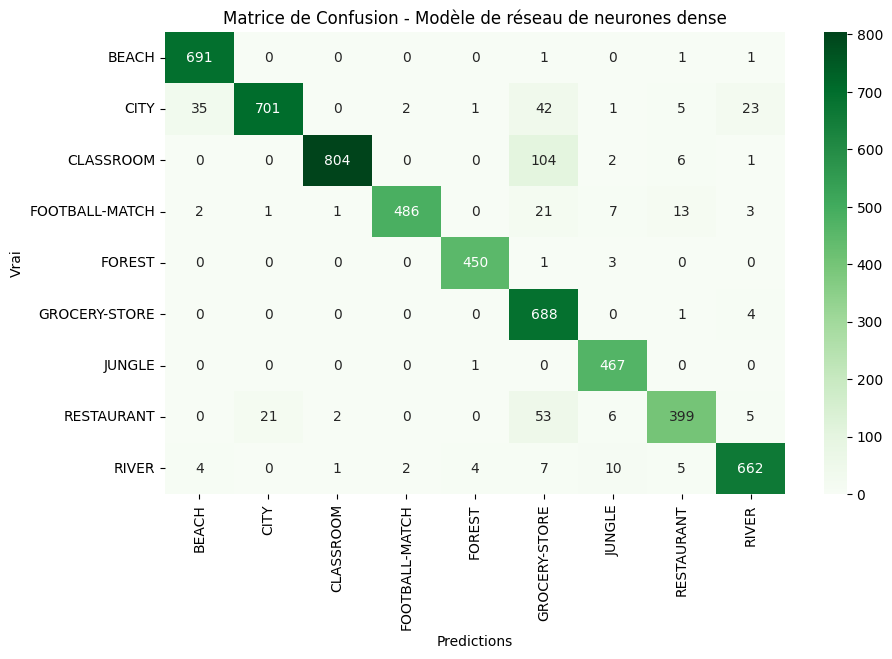

In [ ]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes_image)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=class_names)
plt.ylabel('Vrai')
plt.xlabel('Predictions')
plt.title('Matrice de Confusion - Modèle de réseau de neurones dense')
plt.show()

On peut remarquer à travers cette matrice de confusion que la plupart des classes sont correctement prédites, sauf pour les classes (city et restaurant) qui montrent certaines mauvaises prédictions.

Sauvegarde du modèle dans un fichier HDF5

### Modele LSTM (Audios)

Notre objectif ici est d'entrainer un modèle LSTM sur les données mfcc

Changement de la structure des données

In [ ]:
X_train_audio = X_train_mfcc.values  # Passage de DataFrame à Ndarray
X_test_audio = X_test_mfcc.values

In [ ]:
type(X_train_audio)

numpy.ndarray

In [ ]:
X_train_audio

array([[-0.61121875, -0.00332913,  0.49922842, ..., -0.54007694,
        -0.14937984, -0.66187955],
       [ 0.91374322, -0.54027274,  0.22013702, ...,  0.51162063,
        -1.33563611, -0.31581336],
       [-0.90385131, -1.39693051, -0.80883737, ..., -1.13559019,
         0.36777859,  1.01364136],
       ...,
       [ 0.87836825, -0.20099944,  0.11183848, ..., -0.54303323,
        -2.03979494, -0.71913737],
       [ 0.78921803,  0.53733833, -0.97855587, ..., -0.52897007,
        -0.17712323, -0.49528478],
       [-0.17678663,  1.05237219, -0.03014883, ...,  1.08262348,
        -0.55670714,  0.92295841]])

Redimensionnement des données d'entraînement X_train pour qu'elles aient la forme attendue par le modèle LSTM.

In [ ]:
X_train_audio = X_train_audio.reshape((X_train_audio.shape[0], 1, X_train_audio.shape[1]))  # (samples, timesteps, features)
X_test_audio = X_test_audio.reshape((X_test_audio.shape[0], 1, X_test_audio.shape[1]))

In [ ]:
X_train_audio.shape

(11501, 1, 104)

In [ ]:
X_test_audio.shape

(5751, 1, 104)

#### Définition du Modèle

In [ ]:
# Définition du modèle LSTM
model = Sequential()

# Première couche LSTM avec 512 neurones et retour des séquences
model.add(LSTM(512, return_sequences=True, input_shape=(X_train_audio.shape[1], X_train_audio.shape[2])))
model.add(Dropout(0.3))  # Dropout pour éviter le surapprentissage

# Deuxième couche LSTM avec 256 neurones
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.3))  # Dropout pour éviter le surapprentissage

# Troisième couche LSTM avec 128 neurones
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))  # Dropout pour éviter le surapprentissage

# Normalisation par lot pour améliorer l'entraînement
model.add(BatchNormalization())

# Couche Dense pour la classification avec 9 classes
model.add(Dense(9, activation='softmax'))  # 9 classes pour classification multiclasse

# Résumé du modèle
model.summary()

In [ ]:
# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entraînement du modèle
model.fit(X_train_audio, y_train, epochs=40, batch_size=32, validation_split=0.2)

#### Evaluation du Modèle LSTM

In [ ]:
# Prédictions sur les données de test
y_pred_audio = model.predict(X_test_audio)

y_pred_classes_audio = np.argmax(y_pred_audio, axis=1)  # On choisi la classe avec la plus grande probabilité

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


1. Précision, Rappel, F1-Score

In [ ]:
precision = precision_score(y_test, y_pred_classes_audio, average='weighted')

recall = recall_score(y_test, y_pred_classes_audio, average='weighted')

f1 = f1_score(y_test, y_pred_classes_audio, average='weighted')

print(f"Précision : {precision:.4f}\n")
print(f"Rappel : {recall:.4f}\n")
print(f"F1-score : {f1:.4f}")

Précision : 0.9446

Rappel : 0.9442

F1-score : 0.9442


2. Rapport de classification

In [ ]:
print("Classification Report :")
print(classification_report(y_test, y_pred_classes_audio, target_names=label_encoder.classes_))

Classification Report :
                precision    recall  f1-score   support

         BEACH       0.96      0.96      0.96       694
          CITY       0.95      0.93      0.94       810
     CLASSROOM       0.96      0.93      0.95       917
FOOTBALL-MATCH       0.93      0.96      0.94       534
        FOREST       1.00      0.97      0.98       454
 GROCERY-STORE       0.92      0.96      0.94       693
        JUNGLE       0.99      1.00      1.00       468
    RESTAURANT       0.87      0.87      0.87       486
         RIVER       0.92      0.94      0.93       695

      accuracy                           0.94      5751
     macro avg       0.94      0.95      0.95      5751
  weighted avg       0.94      0.94      0.94      5751



3. Matrice de Confusion

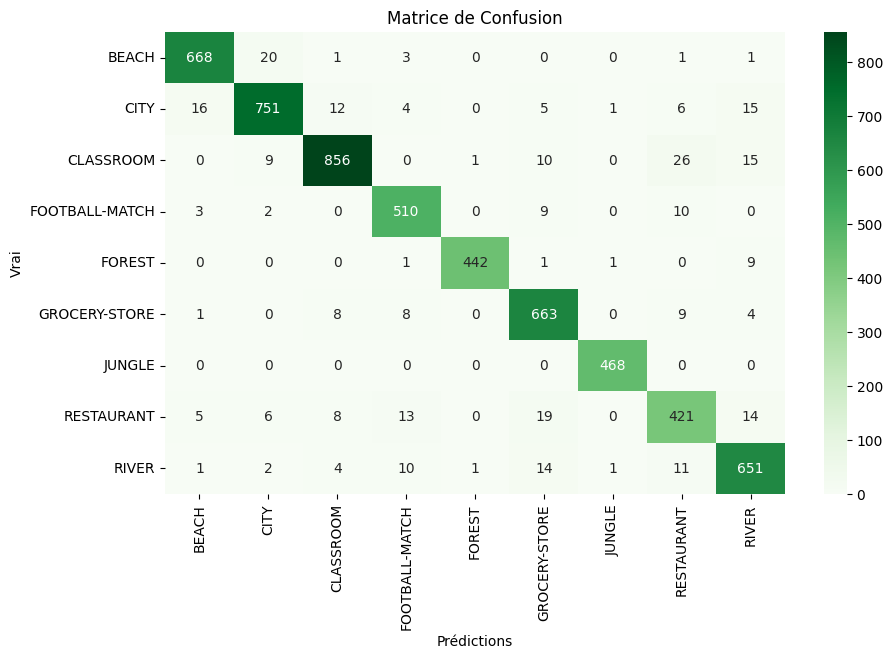

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_classes_audio)

# Visualisation de la matrice de confusion avec Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Vrai")
plt.title("Matrice de Confusion")
plt.show()

On peut observer que pour la majorité des classes, il y a quelques prédictions incorrectes, à l'exception de la classe jungle.

### Fusion par moyenne

Par fois les deux modèles prédisent des classes différentes, donc on va utiliser la fusion par moyenne, c'est tout simplenemt de faire la moyenne des probabilités donnés par chaque modèle, puis voir la classe correspondante à la probabilitée maximale

In [ ]:
def fusion_moyenne(proba_image, proba_audio):

    # Fusion par moyenne des prédictions
    fused_proba = (proba_image + proba_audio) / 2

    # La classe finale (celle avec la probabilité la plus élevée)
    final_predictions = np.argmax(fused_proba, axis=1)

    return final_predictions

Appliquation de la fusion par moyenne

In [ ]:
final_predictions = fusion_moyenne(y_pred_image, y_pred_audio)

Précision, Rappel, F1-Score

In [ ]:
precision = precision_score(y_test, final_predictions, average='weighted')

recall = recall_score(y_test, final_predictions, average='weighted')

f1 = f1_score(y_test, final_predictions, average='weighted')

print(f"Précision : {precision:.4f}\n")
print(f"Rappel : {recall:.4f}\n")
print(f"F1-score : {f1:.4f}")

Précision : 0.9740

Rappel : 0.9739

F1-score : 0.9738


Rapport de classification

In [ ]:
print("Rapport de classification :")
print(classification_report(y_test, final_predictions, target_names=label_encoder.classes_))

Rapport de classification :
                precision    recall  f1-score   support

         BEACH       0.98      1.00      0.99       694
          CITY       0.98      0.95      0.97       810
     CLASSROOM       0.98      0.96      0.97       917
FOOTBALL-MATCH       0.97      0.99      0.98       534
        FOREST       1.00      1.00      1.00       454
 GROCERY-STORE       0.96      0.99      0.98       693
        JUNGLE       0.99      1.00      1.00       468
    RESTAURANT       0.95      0.90      0.93       486
         RIVER       0.95      0.98      0.97       695

      accuracy                           0.97      5751
     macro avg       0.97      0.97      0.97      5751
  weighted avg       0.97      0.97      0.97      5751



D'aprés ces statistiques on peut observer qu'il y a une amélioration dans les prédictions.

### Bagging à base de RandomForset

- Notre objectif est de créer un modèle de machine learning basé sur le bagging, qui entraîne sur les prédictions de nos deux modèles (réseau de neurones dense et LSTM)

- Étapes :
    1. Obtenir les prédictions de deux modèles sur le jeu d'entraînement.
    2. Utiliser ces prédictions comme nouvelles caractéristiques pour le modèle de machine learning de bagging (un classificateur basé sur un Random Forest).
    3. Former un modèle bagging en utilisant ces nouvelles caractéristiques (les prédictions des modèles précédents).

1. Préparation des données d'entrainement

In [ ]:
pred_model_image = model_image.predict(X_train_image)  # Prédictions du réseau de neurones dense
pred_model_audio = model.predict(X_train_audio)  # Prédictions du LSTM

# Conversion
pred_model_image_classes = np.argmax(pred_model_image, axis=1)
pred_model_audio_classes = np.argmax(pred_model_audio, axis=1)

360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Combine les prédictions des deux modèles comme nouvelles caractéristiques
X_combined_train = np.column_stack((pred_model_image_classes, pred_model_audio_classes))

X_combined_test = np.column_stack((y_pred_classes_image, y_pred_classes_audio))

Le nombre de différences entre les prédictions des deux modèles pour les données d'entrainement

In [ ]:
count_diff = np.sum(X_combined_train[:, 0] != X_combined_train[:, 1])

print(count_diff)

713


2. Définition du modèle

In [ ]:
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100),
                                 n_estimators=10,  # Nombre d'arbres du bagging
                                 random_state=42)

3. Entraînement du modèle de bagging

In [ ]:
bagging_model.fit(X_combined_train, y_train)

4. Evaluation du modèle

In [ ]:
# Prédiction sur les données de test
y_pred_combined = bagging_model.predict(X_combined_test)

    4.1. Précision, Rappel, F1-Score

In [ ]:
precision = precision_score(y_test, y_pred_combined, average='weighted')

recall = recall_score(y_test, y_pred_combined, average='weighted')

f1 = f1_score(y_test, y_pred_combined, average='weighted')

print(f"Précision: {precision}\n")
print(f"Rappel: {recall}\n")
print(f"F1-Score: {f1}")

Précision: 0.9658643921331732

Rappel: 0.9657450878108155

F1-Score: 0.96564350716984


Il y a un vrai amélioration dans la précision des prédictions

    4.2. Rapport de la classification

In [ ]:
print("Rapport de la classification :")
print(classification_report(y_test, y_pred_combined, target_names=class_names))

Rapport de la classification :
                precision    recall  f1-score   support

         BEACH       1.00      0.96      0.98       694
          CITY       0.95      0.97      0.96       810
     CLASSROOM       0.97      0.99      0.98       917
FOOTBALL-MATCH       0.95      0.99      0.97       534
        FOREST       1.00      0.98      0.99       454
 GROCERY-STORE       0.96      0.95      0.95       693
        JUNGLE       1.00      1.00      1.00       468
    RESTAURANT       0.92      0.88      0.90       486
         RIVER       0.96      0.96      0.96       695

      accuracy                           0.97      5751
     macro avg       0.97      0.96      0.97      5751
  weighted avg       0.97      0.97      0.97      5751



In [ ]:
def classify(model_image, single_image_features, model_audio, single_audio_features, model_final, label_encoder):

    #Prédiction du modèle image
    single_image_features = single_image_features.reshape(1, -1)
    prediction_image = model_image.predict(single_image_features)  # les probabilitées de la prédiction

    # Conversion des probabiltées des prédictions en classe
    class_image = prediction_image.argmax(axis=1)[0]


    # Prédiction du modèle audio
    single_audio_mfcc_features = single_audio_features.reshape(1, 1, -1)
    prediction_audio = model_audio.predict(single_audio_mfcc_features)

    class_audio = prediction_audio.argmax(axis=1)[0]  # Classe prédite

    if class_audio == class_image:

         # Décodage de l'indice en label
        decoded_label = label_encoder.inverse_transform([class_image])[0]

        print(f'Les deux modèles (Réseau de neurones dense et LSTM) ont prédit la classe: {decoded_label}')

    else:

        decoded_label_image = label_encoder.inverse_transform([class_image])[0]
        print(f'Le modèle (Réseau de neurones) a prédit la classe: {decoded_label_image}')

        decoded_label_audio = label_encoder.inverse_transform([class_audio])[0]
        print(f'Le modèle (LSTM) a prédit la classe: {decoded_label_audio}')

        fusion_moyenne_pred = fusion_moyenne(prediction_image, prediction_audio)
        class_fusion = fusion_moyenne_pred[0]

        decoded_label_fusion = label_encoder.inverse_transform([class_fusion])[0]
        print(f'La fusion par moyenne a donné la classe: {decoded_label_fusion}')

        # Combinaison des prédictions en une seule entrée
        combined_features = np.array([[class_image, class_audio]])

        # Prédiction finale avec le modèle bagging
        final_prediction = model_final.predict(combined_features)
        final_class = final_prediction[0]  # Indice de la classe prédite

        # Décodage de l'indice en label
        decoded_label_bagging = label_encoder.inverse_transform([final_class])[0]
        print(f'Le modèle Bagging a donné la classe: {decoded_label_bagging}')


On test sur l'exemple à l'indice index_exemple des données de test

In [ ]:
#index_example = 6 # erreur de classification
index_example = 0

single_image_features = X_test_image.iloc[index_example].to_numpy()
signe_audio_mfcc_features = X_test_mfcc.iloc[index_example].to_numpy()

y_label = y_test.iloc[index_example]

In [ ]:
y_predicted = classify(model_image, single_image_features, model, signe_audio_mfcc_features, bagging_model, label_encoder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Les deux modèles (Réseau de neurones dense et LSTM) ont prédit la classe: BEACH


In [ ]:
print(f'La classe réelle est : {label_encoder.inverse_transform([y_label])[0]}')

La classe réelle est : BEACH


.

In [ ]:
# model_image.save(os.path.join("/content/drive/MyDrive//Multimodale/Model", "Model - Tardive", "model_image_tardive_RESNET50.h5"))

In [ ]:
# model.save(os.path.join("/content/drive/MyDrive/Multimodale/Model/", "Model - Tardive", "model_audio_tardive_RESNET50.h5"))

In [ ]:
# dump(bagging_model, os.path.join("/content/drive/MyDrive/Multimodale/Model/", "Model - Tardive", "model_bagging_tardive_RESNET50.joblib"))